In [1]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import numpy as np
from sklearn.model_selection import StratifiedKFold
from config_file import config
import pandas as pd
import Train_model
import Test_model
from tensorflow.compat.v1 import ConfigProto 
from tensorflow.compat.v1 import InteractiveSession 
import tensorflow as tf 
import keras
from keras import backend
import matplotlib.pyplot as plt

importing Jupyter notebook from config_file.ipynb
importing Jupyter notebook from Train_model.ipynb
importing Jupyter notebook from model.ipynb


Using TensorFlow backend.


importing Jupyter notebook from Test_model.ipynb


keras version number is 2.3.0

In [2]:
keras.__version__

'2.3.0'

tensorflow version number is 2.0.0

In [3]:
tf.__version__

'2.0.0'

   cuda version number is 10.0.130.cuda is a parallel computing platform and programming model founded by NVIDIA based on their company's graphics processing units GPUs (Graphics Processing Units, which can be commonly understood as graphics cards).

In [4]:
cat /usr/local/cuda/version.txt

CUDA Version 10.0.130


cudnn version number is 7.4.2.It is a GPU-based acceleration library designed by NVIDIA specifically for basic operations in Deep Neural Networks.

In [5]:
cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 4
#define CUDNN_PATCHLEVEL 2
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [6]:
classes = config["run"]["classes"]
n_splits_k = config["Train_model"]["n_splits_k"]

In [7]:
classes

['BENIGN', 'ATTACK']

In [8]:
n_splits_k

8

Compile and train the model

In [21]:
def run_main():

    os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'    

    datasets = pd.read_csv("data/data_total3.csv") 
    features = datasets.iloc[:,:-1]
    labels =  datasets.iloc[:,-1]
    skf = StratifiedKFold(n_splits=n_splits_k,random_state = 2)
    test_loss_all = []
    test_accuracy_all = []
    Numberofcrossvalidations = 0
    for train_index, test_index in skf.split(features, labels):  
        
        features_train = features.iloc[train_index]
        features_test =  features.iloc[test_index]
        labels_train = labels.iloc[train_index]
        labels_test =  labels.iloc[test_index]
        features_train = features_train.values
        labels_train = labels_train.values
        features_test = features_test.values
        labels_test = labels_test.values
        labels_train = labels_train.reshape(len(labels_train))
        labels_test = labels_test.reshape(len(labels_test))
        print("Number of examples in the train set:",labels_train.shape)
        print("Number of examples in the test set:",labels_test.shape)
        history = Train_model.train_model(features_train,labels_train)
        print (history.history)
        
        
        fig = plt.figure()
        plt.plot(history.history['accuracy'],label='training acc')
        plt.plot(history.history['val_accuracy'],label='val acc')
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(loc='lower right')
        plt.show()
        fig.savefig('train'+'acc.png')
        fig = plt.figure()
        plt.plot(history.history['loss'],label='training loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(loc='upper right')
        plt.show()
        fig.savefig('train'+'loss.png')
        
        test_loss,test_accuracy = Test_model.test_model(features_test,labels_test)
        print('Number of cross-validations is {},Test_loss is {},Test_accuracy is {}'.format(Numberofcrossvalidations+1,test_loss,test_accuracy))
        test_loss_all.append(test_loss)
        test_accuracy_all.append(test_accuracy)
        
        Numberofcrossvalidations += 1 
    plt.figure()
    plt.plot(range(Numberofcrossvalidations),test_loss_all)
    plt.ylabel('Test_loss')
    plt.xlabel('Number of cross-validations')
    plt.title('Test_loss')
    plt.show()
    
    plt.figure()
    plt.plot(range(Numberofcrossvalidations),test_accuracy_all)
    plt.ylabel('Test_accuracy')
    plt.xlabel('Number of cross-validations')
    plt.title('Test_accuracy')
    plt.show()
        
        
        
        
        
        
        
        
        


Number of examples in the train set: (976972,)
Number of examples in the test set: (139568,)


model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


Train on 781577 samples, validate on 195395 samples
Epoch 1/10
781577/781577 [==============================] - 244s 313us/step - loss: 0.0294 - accuracy: 0.9932 - val_loss: 0.0210 - val_accuracy: 0.9939

Epoch 00001: val_accuracy improved from -inf to 0.99394, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781577/781577 [==============================] - 243s 311us/step - loss: 0.0149 - accuracy: 0.9969 - val_loss: 0.0193 - val_accuracy: 0.9945

Epoch 00002: val_accuracy improved from 0.99394 to 0.99447, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781577/781577 [==============================] - 244s 313us/step - loss: 0.0119 - accuracy: 0.9976 - val_loss: 0.0127 - val_accuracy: 0.9962

Epoch 00003: val_accuracy improved from 0.99447 to 0.99620, saving model to training_checkpoints/weights.best.hdf5
Epoch 4/10
781577/781577 [==============================] - 244s 313us/step - loss: 0.0105 - accuracy: 0.9979 - val_loss: 0.0126 - val_accuracy: 0.

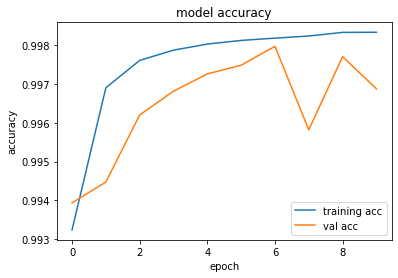

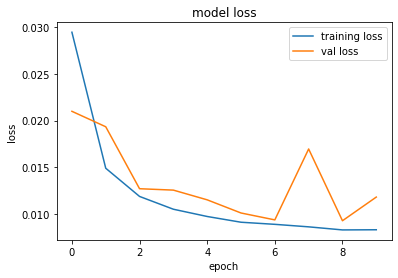

    32/139568 [..............................] - ETA: 3:04

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139568/139568 [==============================] - 23s 163us/step
Number of cross-validations is 1,Test_loss is 0.30873283966567533,Test_accuracy is 0.9839863181114197
Number of examples in the train set: (976972,)
Number of examples in the test set: (139568,)
Train on 781577 samples, validate on 195395 samples
Epoch 1/10
781577/781577 [==============================] - 245s 313us/step - loss: 0.0327 - accuracy: 0.9922 - val_loss: 0.0285 - val_accuracy: 0.9933

Epoch 00001: val_accuracy improved from -inf to 0.99333, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781577/781577 [==============================] - 244s 312us/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.0179 - val_accuracy: 0.9953

Epoch 00002: val_accuracy improved from 0.99333 to 0.99534, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781577/781577 [==============================] - 243s 311us/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0163 - val_accuracy: 0.9957

Epo

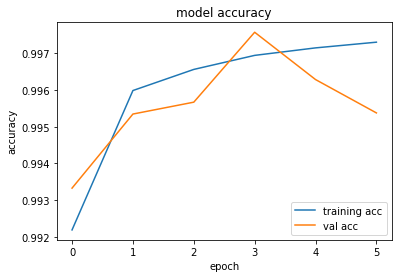

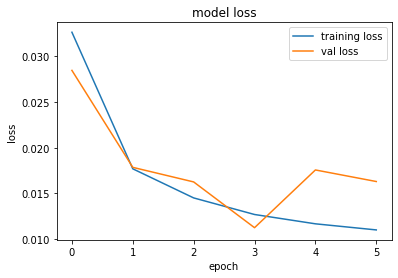

    32/139568 [..............................] - ETA: 3:03

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139568/139568 [==============================] - 23s 163us/step
Number of cross-validations is 2,Test_loss is 0.15150052172954578,Test_accuracy is 0.9303421974182129
Number of examples in the train set: (976972,)
Number of examples in the test set: (139568,)
Train on 781577 samples, validate on 195395 samples
Epoch 1/10
781577/781577 [==============================] - 247s 316us/step - loss: 0.0328 - accuracy: 0.9919 - val_loss: 0.0218 - val_accuracy: 0.9942

Epoch 00001: val_accuracy improved from -inf to 0.99416, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781577/781577 [==============================] - 246s 315us/step - loss: 0.0172 - accuracy: 0.9960 - val_loss: 0.0155 - val_accuracy: 0.9960

Epoch 00002: val_accuracy improved from 0.99416 to 0.99596, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781577/781577 [==============================] - 246s 315us/step - loss: 0.0143 - accuracy: 0.9965 - val_loss: 0.0184 - val_accuracy: 0.9950

Epo

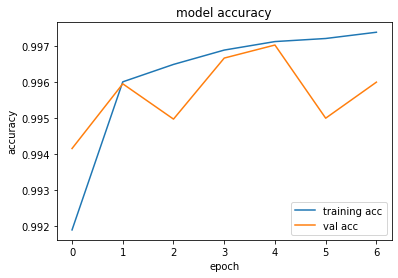

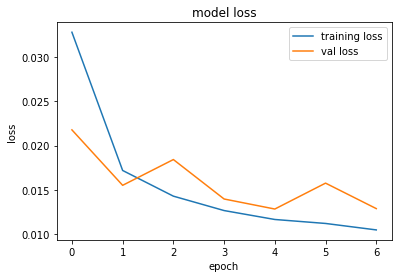

    32/139568 [..............................] - ETA: 3:01

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139568/139568 [==============================] - 23s 162us/step
Number of cross-validations is 3,Test_loss is 0.009600412259795472,Test_accuracy is 0.9983090758323669
Number of examples in the train set: (976972,)
Number of examples in the test set: (139568,)
Train on 781577 samples, validate on 195395 samples
Epoch 1/10
781577/781577 [==============================] - 244s 313us/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.0266 - val_accuracy: 0.9935

Epoch 00001: val_accuracy improved from -inf to 0.99347, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781577/781577 [==============================] - 245s 313us/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.0154 - val_accuracy: 0.9969

Epoch 00002: val_accuracy improved from 0.99347 to 0.99692, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781577/781577 [==============================] - 244s 313us/step - loss: 0.0142 - accuracy: 0.9965 - val_loss: 0.0188 - val_accuracy: 0.9951

Ep

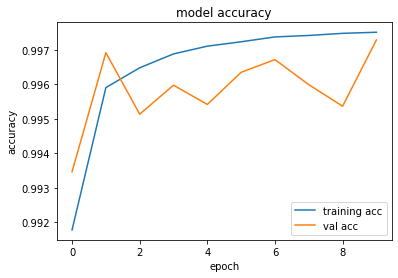

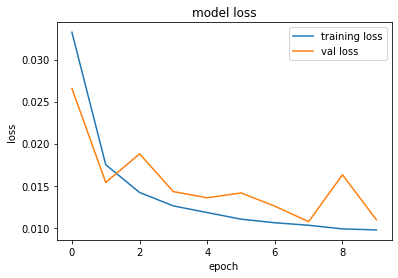

    32/139568 [..............................] - ETA: 3:04

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139568/139568 [==============================] - 23s 163us/step
Number of cross-validations is 4,Test_loss is 0.008837643460909022,Test_accuracy is 0.9982016086578369
Number of examples in the train set: (976972,)
Number of examples in the test set: (139568,)
Train on 781577 samples, validate on 195395 samples
Epoch 1/10
781577/781577 [==============================] - 252s 322us/step - loss: 0.0343 - accuracy: 0.9915 - val_loss: 0.0426 - val_accuracy: 0.9881

Epoch 00001: val_accuracy improved from -inf to 0.98809, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781577/781577 [==============================] - 250s 319us/step - loss: 0.0179 - accuracy: 0.9958 - val_loss: 0.0263 - val_accuracy: 0.9934

Epoch 00002: val_accuracy improved from 0.98809 to 0.99344, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781577/781577 [==============================] - 248s 318us/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.0177 - val_accuracy: 0.9945

Ep

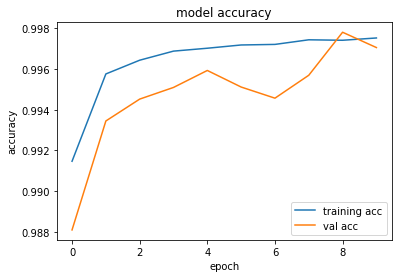

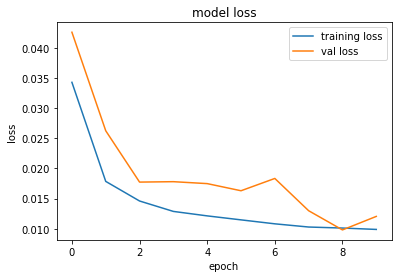

    32/139568 [..............................] - ETA: 3:02

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139568/139568 [==============================] - 23s 163us/step
Number of cross-validations is 5,Test_loss is 0.007679274457416191,Test_accuracy is 0.998631477355957
Number of examples in the train set: (976973,)
Number of examples in the test set: (139567,)
Train on 781578 samples, validate on 195395 samples
Epoch 1/10
781578/781578 [==============================] - 249s 319us/step - loss: 0.0265 - accuracy: 0.9937 - val_loss: 0.0212 - val_accuracy: 0.9947

Epoch 00001: val_accuracy improved from -inf to 0.99474, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781578/781578 [==============================] - 248s 318us/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 0.0168 - val_accuracy: 0.9957

Epoch 00002: val_accuracy improved from 0.99474 to 0.99570, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781578/781578 [==============================] - 249s 319us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0162 - val_accuracy: 0.9952

Epo

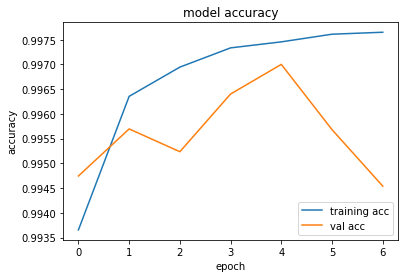

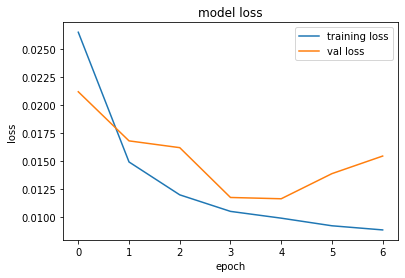

    32/139567 [..............................] - ETA: 3:01

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139567/139567 [==============================] - 23s 162us/step
Number of cross-validations is 6,Test_loss is 0.6947477044236627,Test_accuracy is 0.8487035036087036
Number of examples in the train set: (976973,)
Number of examples in the test set: (139567,)
Train on 781578 samples, validate on 195395 samples
Epoch 1/10
781578/781578 [==============================] - 245s 313us/step - loss: 0.0333 - accuracy: 0.9919 - val_loss: 0.0281 - val_accuracy: 0.9926

Epoch 00001: val_accuracy improved from -inf to 0.99265, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781578/781578 [==============================] - 245s 314us/step - loss: 0.0177 - accuracy: 0.9959 - val_loss: 0.0215 - val_accuracy: 0.9935

Epoch 00002: val_accuracy improved from 0.99265 to 0.99354, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781578/781578 [==============================] - 247s 316us/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0242 - val_accuracy: 0.9934

Epoc

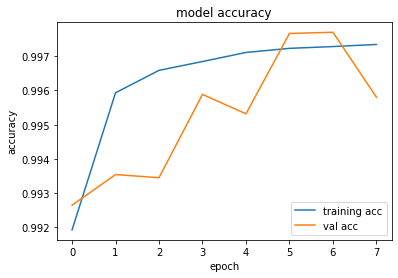

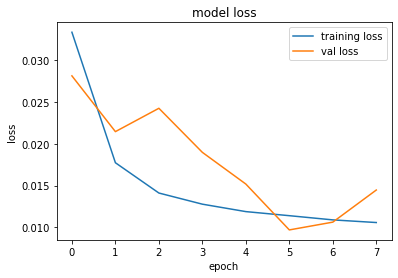

    32/139567 [..............................] - ETA: 3:07

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139567/139567 [==============================] - 23s 163us/step
Number of cross-validations is 7,Test_loss is 0.006767735330851546,Test_accuracy is 0.998703122138977
Number of examples in the train set: (976974,)
Number of examples in the test set: (139566,)
Train on 781579 samples, validate on 195395 samples
Epoch 1/10
781579/781579 [==============================] - 249s 318us/step - loss: 0.0293 - accuracy: 0.9932 - val_loss: 0.0231 - val_accuracy: 0.9949

Epoch 00001: val_accuracy improved from -inf to 0.99486, saving model to training_checkpoints/weights.best.hdf5
Epoch 2/10
781579/781579 [==============================] - 248s 317us/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.0204 - val_accuracy: 0.9951

Epoch 00002: val_accuracy improved from 0.99486 to 0.99514, saving model to training_checkpoints/weights.best.hdf5
Epoch 3/10
781579/781579 [==============================] - 249s 318us/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0194 - val_accuracy: 0.9945

Epo

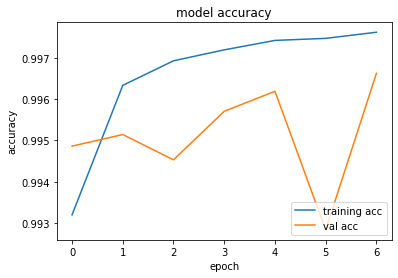

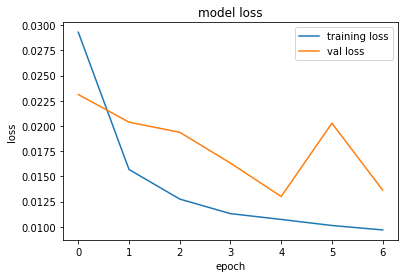

model.ipynb:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "output_type": "stream",
model.ipynb:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini..., bias_initializer=<keras.ini..., use_bias=True)`
  "importing Jupyter notebook from config_file.ipynb\n"


139566/139566 [==============================] - 23s 162us/step
Number of cross-validations is 8,Test_loss is 0.6260360956931538,Test_accuracy is 0.8764670491218567


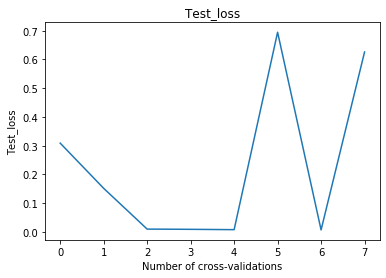

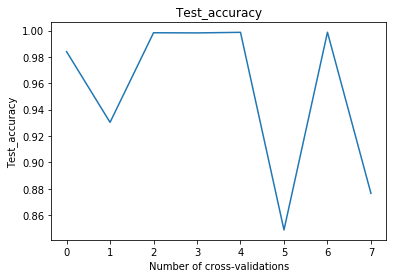

In [22]:
if __name__ =="__main__":
    run_main()